# **Portfolio Part - 4** - Analysis on  Medical Cost Personal Dataset




# **Dataset Background:**
The dataset provided is the Medical Cost Personal Dataset sourced from Kaggle. It contains records of personal attributes such as age, BMI, and smoker status, along with the corresponding medical costs (charges). This dataset is commonly used for regression tasks to predict medical insurance charges based on various factors.
Link to the dataset : https://www.kaggle.com/datasets/mirichoi0218/insurance

The main objective is an analysis or regression task aimed at predicting medical insurance charges based on personal attributes such as age, BMI, smoking status, and region.
And to explore relationships between personal factors and medical costs.

# **Data Description:**
The dataset consists of 1,338 observations and the following 7 variables:


1.   age: The age of the individual (integer).
2.   sex: The gender of the individual, either 'male' or 'female' (categorical)
3.   bmi: Body Mass Index (BMI), a measure of body fat based on height and weight (float).
4.   children: Number of dependent children covered by health insurance (integer)
5.   smoker: Whether the individual is a smoker ('yes' or 'no') (categorical).
6.   region: The residential area in the US (northwest, northeast, southwest, southeast) (categorical).
7.   charges: The medical cost billed to the individual (float), which serves as the target variable for predicting medical costs.







In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
data = pd.read_csv("insurance.csv")

# Displaying first few rows
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Checking data information
print(data.info())

# Summary statistics
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

# Visualize the distribution of key variables:

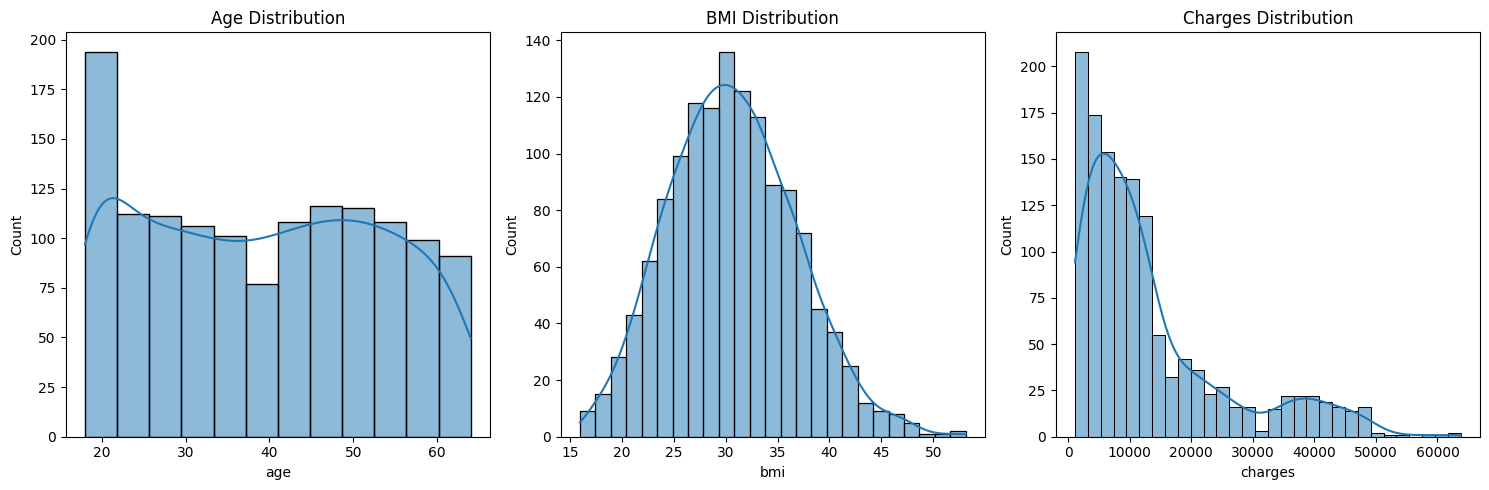

In [ ]:
# Distribution of age, BMI, and charges
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['charges'], kde=True)
plt.title('Charges Distribution')

plt.tight_layout()
plt.show()


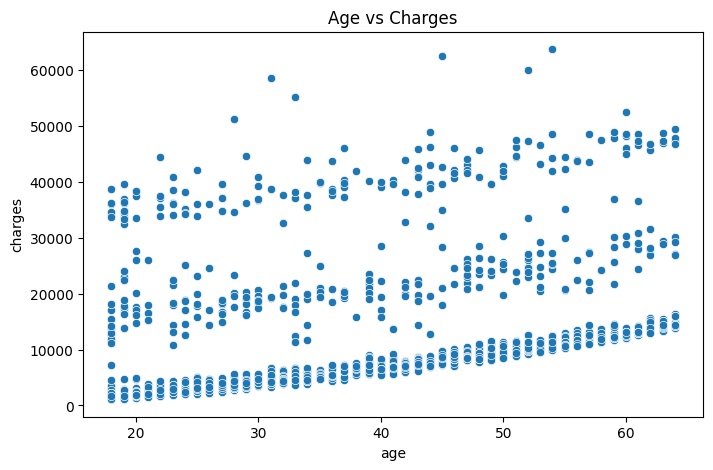

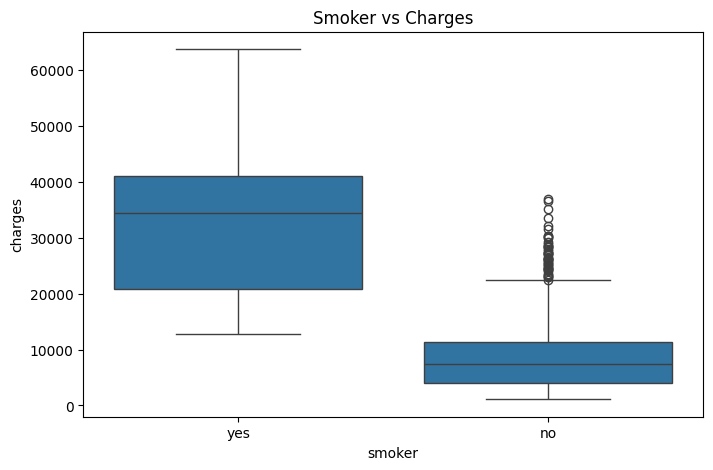

In [ ]:
# Scatter plot for Age vs Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['age'], y=data['charges'])
plt.title('Age vs Charges')
plt.show()

# Boxplot for Smoker vs Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()


# Check for missing data and handle any outliers:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


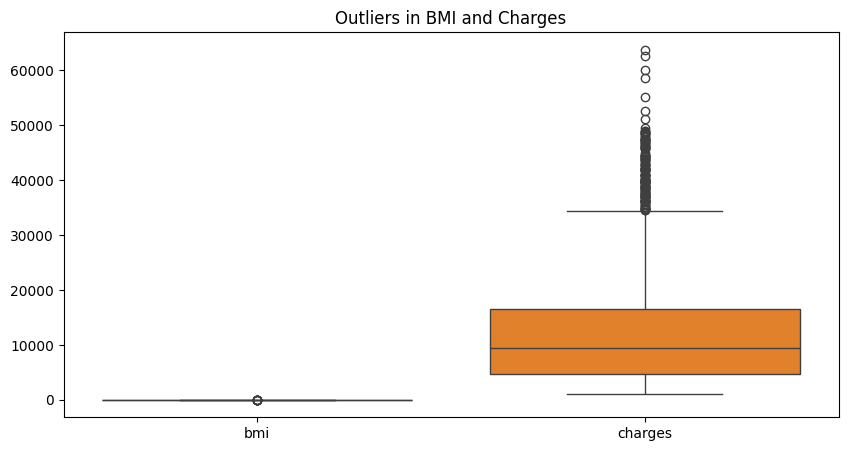

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Detect outliers in BMI and Charges using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['bmi', 'charges']])
plt.title('Outliers in BMI and Charges')
plt.show()


# Linear Regression

In [ ]:

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Spliting the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724


# Polynomial Regression (Improvement over Linear)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Creating a polynomial regression model
degree = 2  # Change this to test different degrees
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Training and fit the model
poly_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_poly = poly_model.predict(X_test)

# Evaluating the polynomial model
print("Mean Squared Error (Polynomial):", mean_squared_error(y_test, y_pred_poly))
print("R-squared (Polynomial):", r2_score(y_test, y_pred_poly))


Mean Squared Error (Polynomial): 20801160.086368766
R-squared (Polynomial): 0.8660139771417649


# **Linear Regression**


*   **Mean Squared Error (MSE)**: The MSE of approximately 33,596,915 indicates that, on average, the predictions are off by a significant amount.  
*   **R-Squared:** An R-squared value of around 0.784 suggests that about 78.4% of the variance in charges can be explained by the model. This is a decent fit, but there’s still room for improvement.




# Polynomial Regression


* **Mean Squared Error (Polynomial):** The MSE has dropped to approximately 20,801,160, indicating that the polynomial regression model has improved predictive accuracy. A lower MSE means the predictions are closer to the actual values.
*   **R-squared (Polynomial):** An R-squared value of around 0.866 indicates a substantial improvement in fit. This means that approximately 86.6% of the variance in charges is now explained by the polynomial model, which is a significant enhancement compared to the linear model.

*The polynomial regression model shows better predictive performance compared to the linear model, reducing MSE and increasing R-squared significantly.*



# Logistic Regression (Baseline Model for Classification)

In [ ]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preparing the data for classification (predict smoker)
X_logistic = data_encoded.drop(['smoker_yes', 'charges'], axis=1)  # Exclude 'charges' and target variable 'smoker_yes'
y_logistic = data_encoded['smoker_yes']  # Target variable for classification

# Spliting the data into training and test sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Training logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)

# Predicting on the test set
y_pred_log = log_model.predict(X_test_log)

# Evaluating the logistic regression model
print("Accuracy (Logistic Regression):", accuracy_score(y_test_log, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))


Accuracy (Logistic Regression): 0.7985074626865671
Confusion Matrix:
 [[214   0]
 [ 54   0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89       214
        True       0.00      0.00      0.00        54

    accuracy                           0.80       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.64      0.80      0.71       268



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

# Neural Network (Improve the Baseline Performance)

In [ ]:
# Importing the MLPClassifier for Neural Networks
from sklearn.neural_network import MLPClassifier

# Training a neural network model (MLP Classifier)
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
nn_model.fit(X_train_log, y_train_log)

# Predicting on the test set using the neural network
y_pred_nn = nn_model.predict(X_test_log)

# Evaluating the neural network model
print("Accuracy (Neural Network):", accuracy_score(y_test_log, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_nn))
print("Classification Report:\n", classification_report(y_test_log, y_pred_nn))


Accuracy (Neural Network): 0.7985074626865671
Confusion Matrix:
 [[214   0]
 [ 54   0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89       214
        True       0.00      0.00      0.00        54

    accuracy                           0.80       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.64      0.80      0.71       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualize the Actual vs Predicted Charges

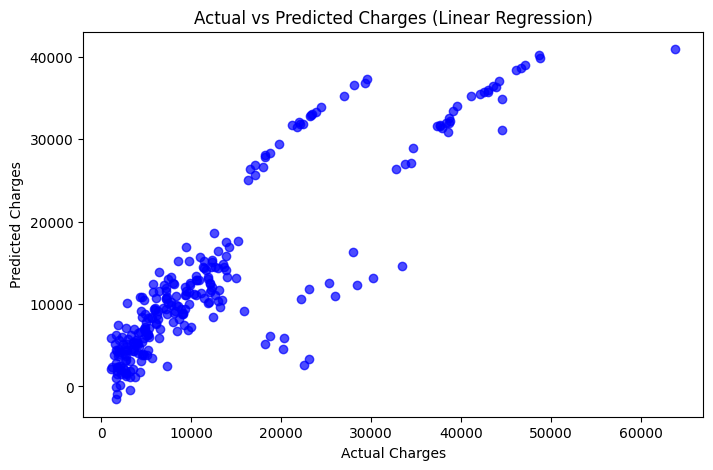

In [ ]:
# Plotting Actual vs Predicted Charges (Linear Model)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.title('Actual vs Predicted Charges (Linear Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


# Visualize the Model Performance

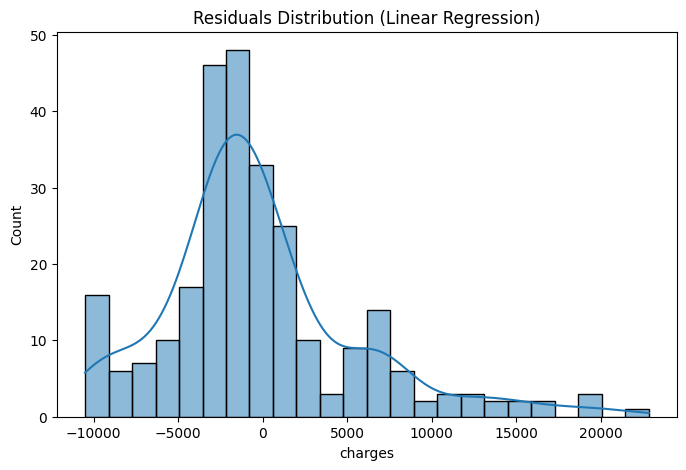

In [ ]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Linear Regression)')
plt.show()
